# ex2.0 jack's car rental

## See p. 81 (section 4.3, example 4.2) in Sutton's Reinforcement learning: An introduction

Goal:

- understanding how to construct an environment
- understanding of the joint probability functions

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import numpy as np
from scipy.stats import poisson

N_CARS = 20

# renting and returning propabilities
P_RETURN_A = poisson.pmf(np.arange(0, N_CARS + 1), 3)
P_RENT_A = poisson.pmf(np.arange(0, N_CARS + 1), 3)
P_RETURN_B = poisson.pmf(np.arange(0, N_CARS + 1), 2)
P_RENT_B = poisson.pmf(np.arange(0, N_CARS + 1), 4)

Poisson distribution of rent and return cars (at second location):

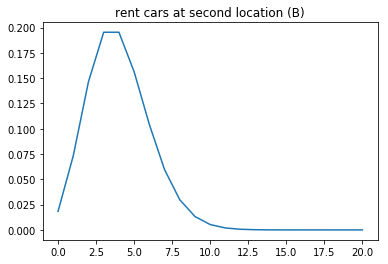

In [3]:
plt.title('rent cars at second location (B)')
plt.plot(P_RENT_B)

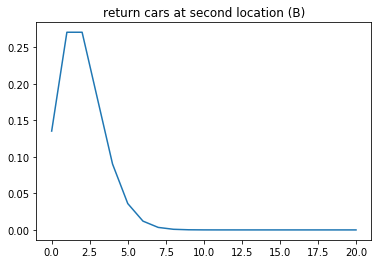

In [4]:
plt.title('return cars at second location (B)')
plt.plot(P_RETURN_B)

# Start! 

Implement useful functions for the environment of the Jack's car rental problem.

In [0]:
def step_rent(n_car, p):
    """return probability distribution over the number of cars after rent"""
    # code here ...
    # ...
    # pp is the probability over cars after rent
    # r is the expected reward
    pp = [0] * len(p)
    r = 0
    for i in range(len(p)):
        if(i <= n_car):
            pp[n_car-i] = p[i]
            r += p[i] * i * 10
        else:
            pp[0] += p[i]
            r += p[i] * n_car * 10
    return pp, r


def step_return(p_car, p):
    """return a distribution over the number of cars aftern returned"""
    # code here ...
    # ...
    # pp is the probability over cars after return
    pp = [0] * len(p)
    for present_car in range(len(p_car)):
        for return_car in range(len(p)):
            if(present_car + return_car <= N_CARS):
                pp[present_car + return_car] += p_car[present_car] * p[return_car]
            else:
                pp[N_CARS] += p_car[present_car] * p[return_car]
    
    return pp


def step_rent_return(n_car, p_rent, p_return):
    """probability after rent and return for one day"""
    p, r = step_rent(n_car, p_rent)
    p = step_return(p, p_return)
    return p, r

## verify rent

reward: 29.99615904998224


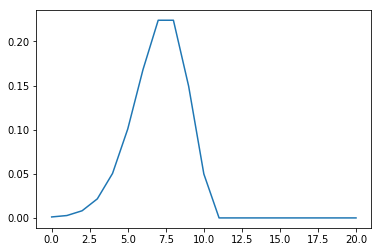

In [6]:
p, r = step_rent(10, P_RENT_A)
print('reward:', r)
plt.plot(p)

Expected result:

reward: 29.99615904998224

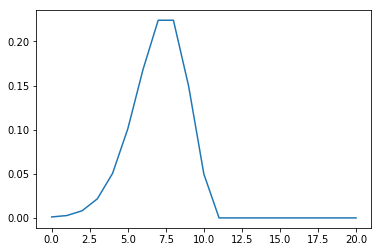

## verify return

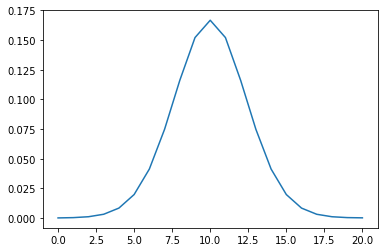

In [15]:
p, r = step_rent(10, P_RENT_A)
p = step_return(p, P_RETURN_A)
plt.plot(p)

Expected result:

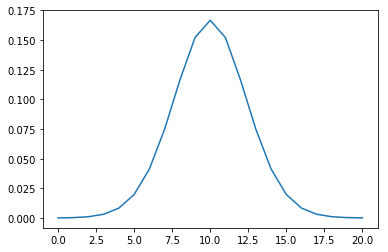

# The environment

Now implement the `step_env(s, a)` to be the environment. This function accepts a state (n_cars in A, n_cars in B) then returns the probability distribution over next state in terms of P(n_cars in A, n_cars in B) with an expected reward.

Hint: use the previous functions.

In [0]:
def step_env(s, a):
    """step a on state s, returning the next state distribution and the expected reward"""
    # s = (N_CARS_IN_A, N_CARS_IN_B)
    # move cars
    # code here ...
    # ...
    move_cost = 2
    m_s = (min(N_CARS, s[0] - a), min(N_CARS, s[1] + a))
    # renting and returning
    # code here ...
    # ...
    p_A, r_A = step_rent_return(m_s[0], P_RENT_A, P_RETURN_A)
    p_B, r_B = step_rent_return(m_s[1], P_RENT_B, P_RETURN_B)
    # p is the "joint" probability over cars at first and second location
    # p has the shape of [N_CARS+1, N_CARS+1] where the dim=0 is the first location, dim=1 is the second location
    # r is the expected reward
    p = np.zeros(shape=(len(p_A), len(p_B)), dtype=np.float)
    for i in range(len(p_A)):
        for j in range(len(p_B)):
            p[i][j] = p_A[i] * p_B[j]
    r = r_A + r_B - abs(a) * move_cost
    return p, r

## verify the environment

reward: 66.0307882387861


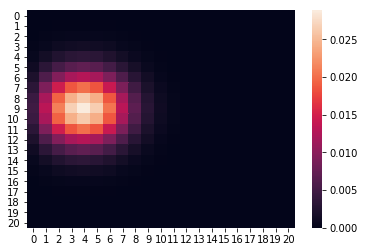

In [49]:
s = (10, 5)
p, r = step_env(s, 1)
print('reward:', r)
sns.heatmap(p)

Expected result:

reward: 66.0307882387861

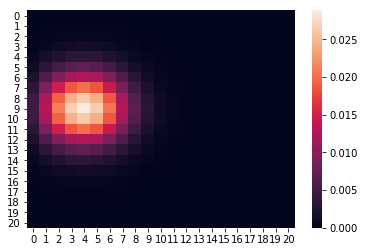